In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
%matplotlib inline

In [24]:
data_path = "/Users/Alertus/OneDrive/Self-learning Queue/toronto-ml-booklearning-meetup/TorontoMachineLearningBookClub/"
os.chdir(data_path)

In [25]:
oil_price = pd.read_csv("oil_price.csv")
oil_price['VALUE'].describe()
oil_price.iloc[7800:7810]

,DATE,VALUE
7800,2015-11-26,NaN
7801,2015-11-27,40.57
7802,2015-11-30,40.43
7803,2015-12-01,40.58
7804,2015-12-02,39.93
7805,2015-12-03,41.08
7806,2015-12-04,40.00
7807,2015-12-07,37.64
7808,2015-12-08,37.46
7809,2015-12-09,37.16


In [26]:


print ('Summary Statistics \n')
print oil_price.describe()
print oil_price.iloc[1,1]
print oil_price.head()

#=== set date data type ===#
oil_price['DATE'] = pd.to_datetime(oil_price['DATE'])

print type(pd.to_datetime(oil_price['DATE']).iloc[1])
print type(oil_price['DATE'].iloc[1])
print oil_price.head()

#=== set date as data index ===#
oil_price.index = pd.DatetimeIndex(oil_price['DATE'])

#=== represent NULL/missing value ===#
print ('Find the missing value: \n')
#print oil_price[oil_price['VALUE']!="."].describe()
#oil_price['VALUE'].replace(".", np.nan, regex=True)
#print oil_price[oil_price['VALUE']!="."].describe()



#=== convert price to number ===#
#oil_price.loc[oil_price['VALUE'] != ".", 'VALUE'] = oil_price[oil_price['VALUE'] != "."]['VALUE'].astype(float)
oil_price['VALUE'] = oil_price['VALUE'].convert_objects(convert_numeric=True)
print oil_price['VALUE'].dtypes
print oil_price['DATE'].dtypes

#=== convert date to age variable ===#
start = oil_price['DATE'].min()
oil_price['AGE'] = (oil_price['DATE'] - start)
oil_price['AGE'] = (oil_price['AGE']/np.timedelta64(1, 'D')) # extract the integer value of days

#=== take non-missing value ===#
oil_price = oil_price[np.isfinite(oil_price['VALUE'])]
oil_price.head()

Summary Statistics 

             VALUE
count  7569.000000
mean     42.850347
std      30.642659
min      10.250000
25%      19.250000
50%      27.180000
75%      65.410000
max     145.310000
26.0
         DATE  VALUE
0  1986-01-02  25.56
1  1986-01-03  26.00
2  1986-01-06  26.53
3  1986-01-07  25.85
4  1986-01-08  25.87
<class 'pandas.tslib.Timestamp'>
<class 'pandas.tslib.Timestamp'>
        DATE  VALUE
0 1986-01-02  25.56
1 1986-01-03  26.00
2 1986-01-06  26.53
3 1986-01-07  25.85
4 1986-01-08  25.87
Find the missing value: 

float64
datetime64[ns]


,DATE,VALUE,AGE
1986-01-02,1986-01-02,25.56,0
1986-01-03,1986-01-03,26.00,1
1986-01-06,1986-01-06,26.53,4
1986-01-07,1986-01-07,25.85,5
1986-01-08,1986-01-08,25.87,6


In [32]:
oil_price[oil_price['DATE'] == '1986-01-02']
oil_price['VALUE'].dtype

dtype('float64')

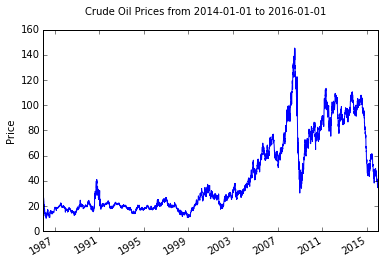

In [28]:
oil_price['VALUE'].plot()
plt.suptitle('Crude Oil Prices from 2014-01-01 to 2016-01-01')
plt.ylabel('Price')

Fit a straighline trend

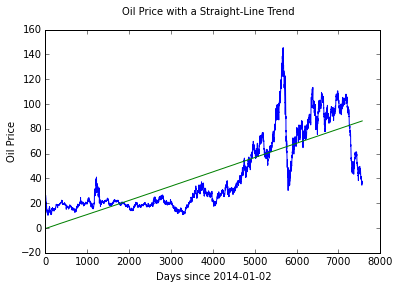

In [29]:
lm = linear_model.LinearRegression()
lm.fit(oil_price['AGE'][:,np.newaxis], oil_price['VALUE'])

plt.plot(oil_price['VALUE'])
plt.plot(lm.predict(oil_price['AGE'][:,np.newaxis]))
plt.suptitle('Oil Price with a Straight-Line Trend')
plt.xlabel('Days since 2014-01-02')
plt.ylabel('Oil Price')

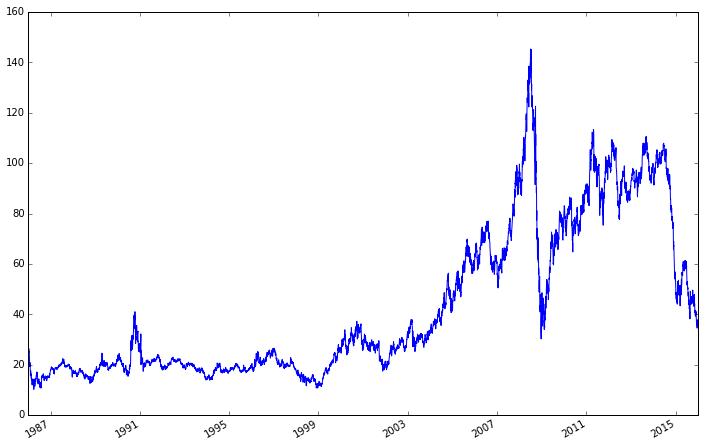

In [41]:
# stats model : pacf / acf to get the n that the data is time lag correlated
import statsmodels.tsa as s
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

oil_price['VALUE'].plot(figsize=(12,8));
#s.stattools.acf(oil_price)

In [ ]:
# clojure: book form toronto library
# example form the book - process the csv data

#3if you see a clear trend you should de-trend it since the AR models based on stationary time series. 
# stationary: constant volatility , constant mean, constant variance
# de-trend the data's linear trend
# in scipy: signaletrend  - for change in mean
# change in variance: plot the acf and pacf and if outside the limits, then it is significant

# hence: AR(2)check th

# check the residuals on qplot to see if normal , if not, if skewed then need to transform

# if you keep a value outsie he limits, then it could be that you need to increase the lag
# predict: ee how it fits 

# git fork form github then push/pull form that